In [1]:
import pandas as pd
import yfinance as yf
from FinMind.data import DataLoader
import matplotlib.pyplot as plt
import mplfinance as mpf
import matplotlib as mpl

In [2]:
df = yf.download('0050.TW', start = '2015-01-01')
df.columns = df.columns.get_level_values(0)

C:\Users\say08\AppData\Local\Temp\ipykernel_8016\2549665335.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('0050.TW', start = '2015-01-01')
[*********************100%***********************]  1 of 1 completed


In [3]:
df['ret'] = df['Close'].pct_change(periods = 1)
df['ret_cum'] = (df['ret'] + 1).cumprod() # 權益曲線

<Axes: xlabel='Date'>

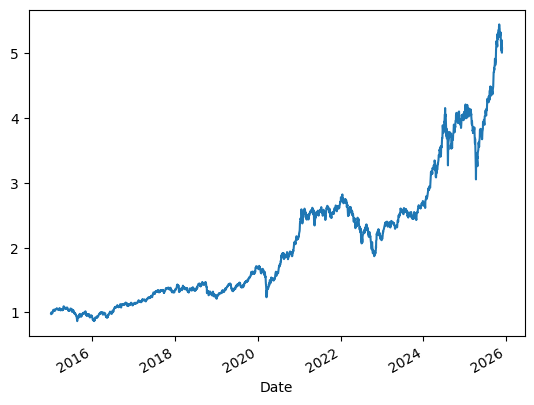

In [4]:
df['ret_cum'].plot()

# 績效指標

### 年化報酬率、年化風險、夏普比率

In [5]:
df = yf.download('0050.TW', start = '2015-01-01')
df.columns = df.columns.get_level_values(0)
df['ret'] = df['Close'].pct_change(periods = 1)
df['ret_cum'] = (df['ret'] + 1).cumprod() # 權益曲線
yr_day_cnt = df.index.year.value_counts().mean() # 每年平均天數
ret_yearly = df['ret'].mean() * yr_day_cnt
print(f'年化報酬率 : {ret_yearly * 100 :,.2f}%')

C:\Users\say08\AppData\Local\Temp\ipykernel_8016\738936051.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('0050.TW', start = '2015-01-01')
[*********************100%***********************]  1 of 1 completed

年化報酬率 : 16.46%


In [6]:
std_yrly = df['ret'].std() * (yr_day_cnt ** 0.5)
print(f'年化風險 : {std_yrly * 100 :,.2f}%')

年化風險 : 18.31%


In [7]:
sharp_yearly = (ret_yearly - 0.02) / std_yrly
print(f'年化夏普比率 : {sharp_yearly :,.4f}')

年化夏普比率 : 0.7897


In [8]:
bad_std_yr = df[df['ret'].lt(0)]['ret'].std() * (yr_day_cnt ** 0.5)
sortino_yr = (ret_yearly - 0.02) / bad_std_yr
print(f'年化所提諾比率 : {sortino_yr :,.4f}')

年化所提諾比率 : 1.0525


# 資產回落 (Max drawdown; MDD)

Max Drawdown (MDD)，中文稱為最大回檔幅度或最大跌幅，衡量的是從歷史最高點（波峰，Peak）到歷史最低點（波谷，Trough）的最大百分比跌幅。
> 如果你真的很幸運，在歷史上最倒楣的那一天買入，並且一直持有直到跌無可跌時才賣出，你會損失多少百分比？  
> 當前股價 ÷ 歷史高點股價  
> 介於 1以下；如果是0.9，代表回檔幅度 10%，如果0.8，代表回檔幅度20%；如果是 1，則代表創新高。

MDD:  33.83%
創高率:  8.97%


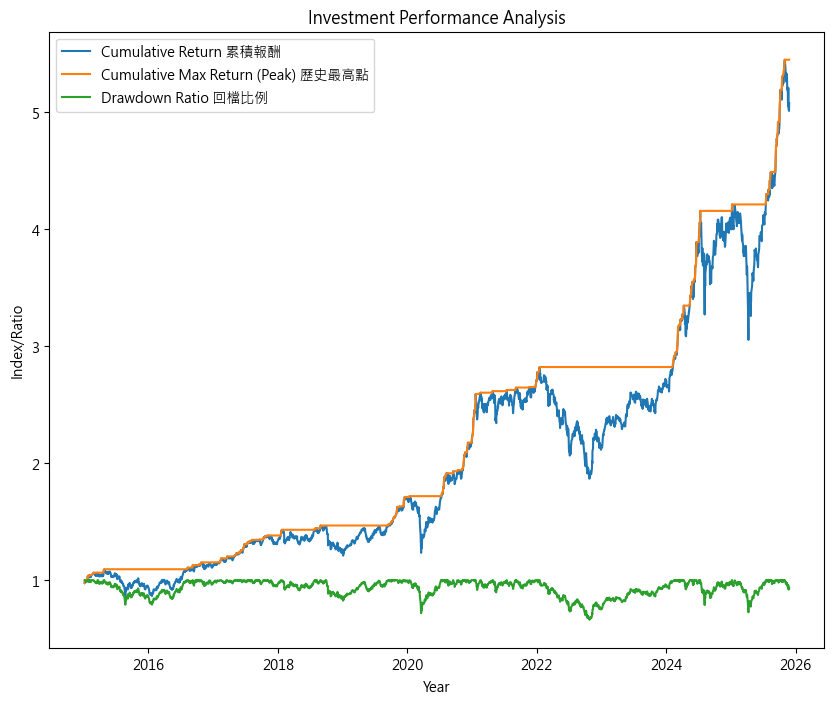

In [9]:
df['ret_cummax'] = df['ret_cum'].cummax()
df['ret_drawdown'] = df['ret_cum'] / df['ret_cummax']
plt.rcParams['font.family'] = ['Microsoft JhengHei']
mpl.rcParams['axes.unicode_minus'] = False 

plt.figure(figsize = (10, 8))

plt.plot(df.index, df['ret_cum'], label='Cumulative Return 累積報酬')
plt.plot(df.index, df['ret_cummax'], label='Cumulative Max Return (Peak) 歷史最高點')
plt.plot(df.index, df['ret_drawdown'], label='Drawdown Ratio 回檔比例')
plt.legend()
plt.title('Investment Performance Analysis')
plt.xlabel('Year')
plt.ylabel('Index/Ratio')


max_drawdown = 1 - df['ret_drawdown'].min()
highpeak_ratio = (df['ret_drawdown'] == 1).mean()
print(f'MDD: {max_drawdown * 100 : ,.2f}%')
print(f'創高率: {highpeak_ratio * 100 : ,.2f}%') # 100天內會創新高幾天
plt.show()

# 多商品的報酬指標計算

C:\Users\say08\AppData\Local\Temp\ipykernel_8016\1309518841.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start = '2015-01-01')
[*********************100%***********************]  1 of 1 completed
C:\Users\say08\AppData\Local\Temp\ipykernel_8016\1309518841.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start = '2015-01-01')
[*********************100%***********************]  1 of 1 completed
C:\Users\say08\AppData\Local\Temp\ipykernel_8016\1309518841.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start = '2015-01-01')
[*********************100%***********************]  1 of 1 completed
C:\Users\say08\AppData\Local\Temp\ipykernel_8016\1309518841.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start = '2015-01-01')
[****************

<Figure size 1000x800 with 0 Axes>

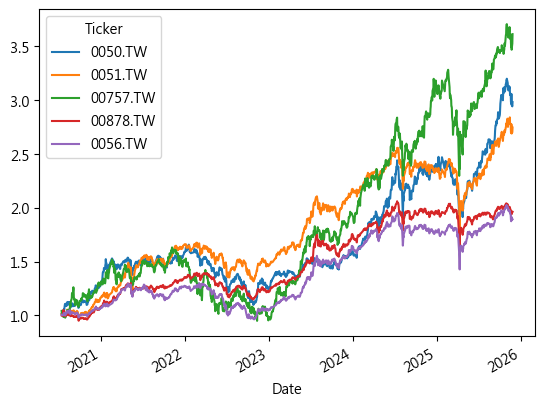

In [10]:
symbols = [
    '0050.TW',
    '0051.TW',
    '00757.TW',
    '00878.TW',
    '0056.TW'
]
df_s = []
for symbol in symbols:
    df = yf.download(symbol, start = '2015-01-01')
    df_s.append(df)
df = pd.concat(df_s, axis = 1)

ret = df['Close'].dropna().pct_change(periods = 1)
plt.figure(figsize = (10, 8))
(ret + 1).cumprod().plot()

plt.show()

In [13]:
yr_day_cnt = df.index.year.value_counts().mean() # 每年平均天數
ret = df['Close'].dropna().pct_change(periods = 1)
ret_yearly = ret.mean() * yr_day_cnt
std_yrly = ret.std() * (yr_day_cnt ** 0.5)
sharp_yearly = (ret_yearly - 0.02) / std_yrly
bad_std_yr = ret[ret.lt(0)].std() * (yr_day_cnt ** 0.5)
sortino_yr = (ret_yearly - 0.02) / bad_std_yr

In [15]:
print(ret_yearly)
print('==========')
print(std_yrly)
print('==========')
print(sharp_yearly)
print('==========')
print(sortino_yr)

Ticker
0050.TW     0.223015
0051.TW     0.203225
00757.TW    0.278290
00878.TW    0.134260
0056.TW     0.129179
dtype: float64
Ticker
0050.TW     0.206339
0051.TW     0.182481
00757.TW    0.286412
00878.TW    0.139653
0056.TW     0.150588
dtype: float64
Ticker
0050.TW     0.983891
0051.TW     1.004077
00757.TW    0.901811
00878.TW    0.818172
0056.TW     0.725019
dtype: float64
Ticker
0050.TW     1.345188
0051.TW     1.190990
00757.TW    1.228782
00878.TW    0.961951
0056.TW     0.836550
dtype: float64
